#Parcial 2 Fisica computacional
Realizado por Valentina Bedoya Aristizabal


Paquetes para usar ROOT

In [27]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [28]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from random import random
from mpl_toolkits.mplot3d import Axes3D

# 1.Histograma de la variable *x*

Lectura de datos

In [32]:
DataChain=ROOT.TChain("SystemTree")
DataChain.Add("/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2/N1017248976.root")

1

Creacion del histograma

Warning in <TROOT::Append>: Replacing existing TH1: Datos de x (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


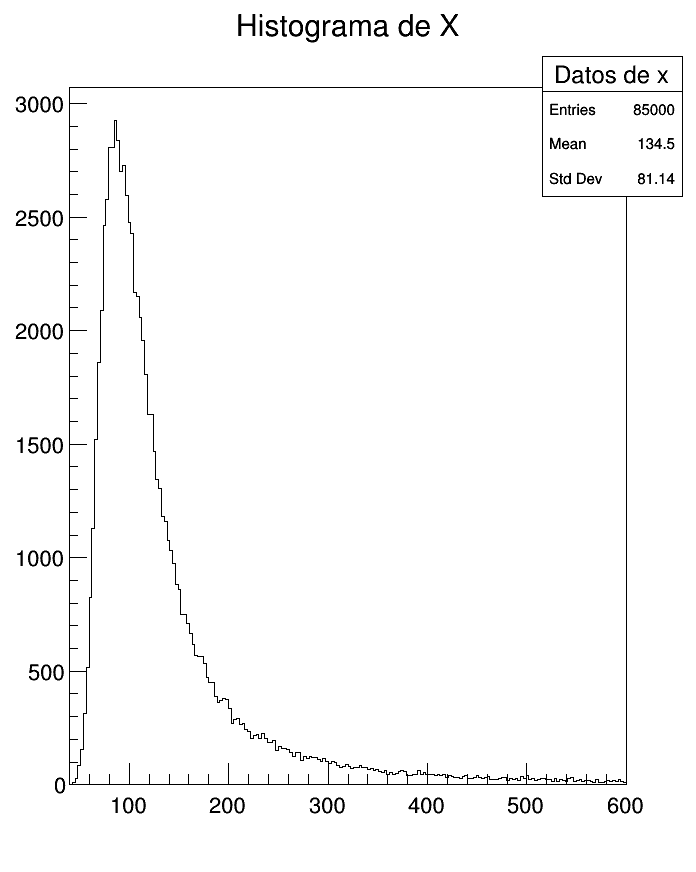

In [54]:
H = ROOT.TH1F( 'Datos de x', 'Histograma de X', 200, 40,600)
X=[]
for entry in DataChain:
  X1=entry.x
  X.append(X1)
  H.Fill(X1)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
H.SetLineColor(1)
H.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()


# 2.Metropolis

In [34]:
NumberOfEventsToCheck=DataChain.GetEntries()
print("We are going to analyze ",NumberOfEventsToCheck, " events")
N=NumberOfEventsToCheck

We are going to analyze  85000  events


In [0]:
def Metropolis(u,c):
  S=[]
  a=40
  b=600
  phi_0=(b-a)*random()+a
  for n in range (N):
      phi_p=(b-a)*random()+a
      if -np.log(ROOT.TMath.Landau(phi_p,u,c,True)/ROOT.TMath.Landau(phi_0,u,c,True))<0:
          S.append(phi_p)
      else:
          x=random()
          p=ROOT.TMath.Landau(phi_p,u,c,True)/ROOT.TMath.Landau(phi_0,u,c,True)
          if x < p:
              S.append(phi_p)
          else:
            S.append(phi_0)
      phi_0=S[-1]
  H3 = ROOT.TH1F( 'H3', 'Histograma de X', 200, a, b)
  for entry in S:
    H3.Fill(entry)
  return H3

  

In [36]:
u,c=100.0, 15.510204081632654
M=Metropolis(u,c)

Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).


# 3.Chi cuadrado

In [37]:
U=np.linspace(100,140,50) #variacion de los parametros de u
C=np.linspace(10,100,50) #variacion de los parametros de c
Chi2=[]
for i in U:
  for j in C:
    Hist=Metropolis(i,j)
    Chi=[]
    for m in range(H.GetNbinsX()+1):
      if H.GetBinContent(m)!=0:
        chi2=((H.GetBinContent(m)-Hist.GetBinContent(m))**2)/H.GetBinContent(m)
        Chi.append(chi2/H.GetNbinsX())
    Chi2.append(np.sum(Chi))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).
War

In [39]:
np.where(Chi2==np.min(Chi2)) #Selecciona la posicion del valor minimo de Chi2

(array([4]),)

In [50]:
Chi2[4] #Valor minimo de Chi2

37.65796502200811

In [49]:
U[0],C[3] #Par de c y u que general el minimo chi2

(100.0, 15.510204081632654)

#Graficos

Warning in <TROOT::Append>: Replacing existing TH1: H3 (Potential memory leak).


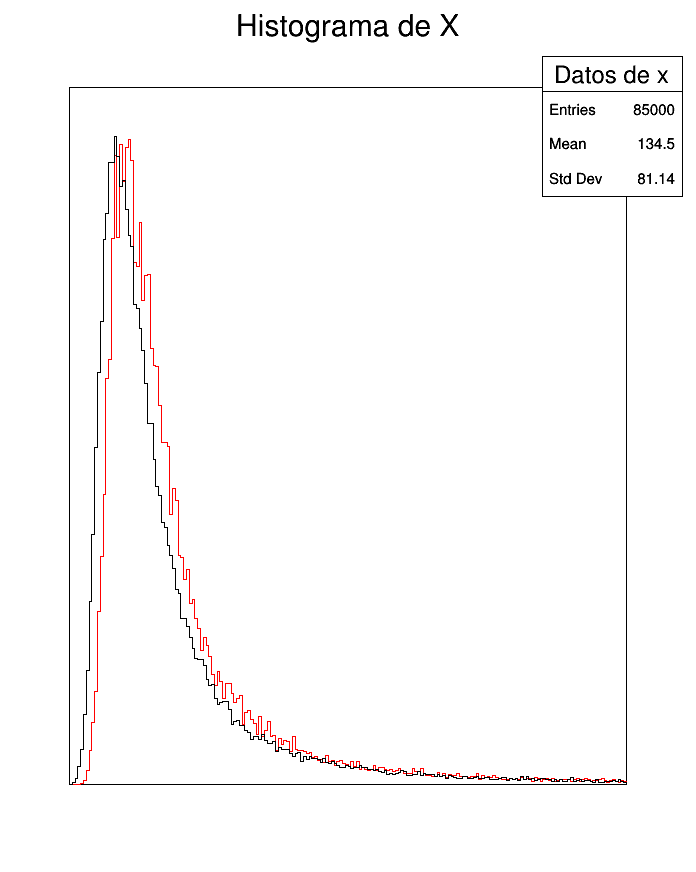

In [72]:
L=Metropolis(U[0],C[3])
L.Draw("Same")
L.SetLineColor(2)
H.Draw("Same")
ROOT.gROOT.GetListOfCanvases().Draw()

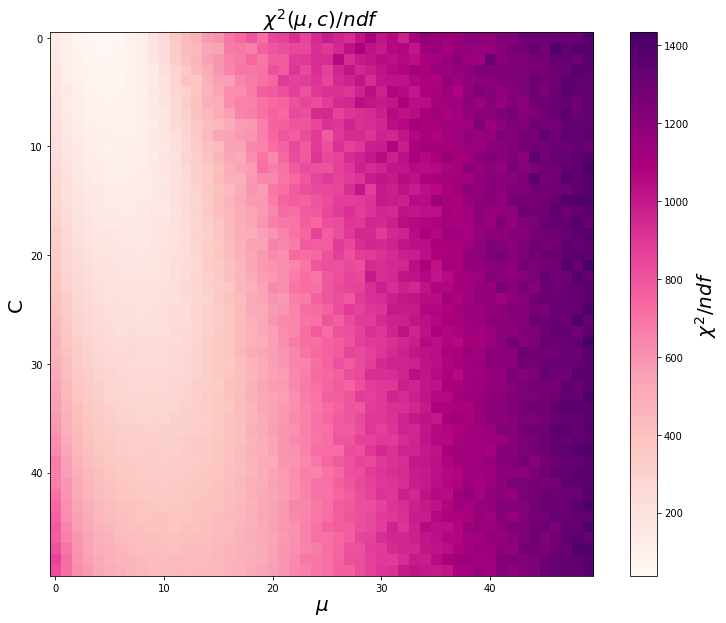

In [41]:
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel(r'$\mu$',size=20)
ax1.set_ylabel('C',size=20)
ax1.set_title(r'$\chi^{2}(\mu,c)/ndf$',size=20)

#c sequence
Chi2=np.array(Chi2)
c = Chi2.reshape(50,50)

#plot
plt.imshow( c,cmap ='RdPu')
cbar = plt.colorbar()
cbar.set_label(r'$\chi^{2}/ndf$',size=20)